# Phase 2 - Milestones 1

## I. Perkenalan

### I.I Identitas

Nama : Ahmad Nawwaaf

Batch : 002

### I.II Dataset

link : <a href="https://www.kaggle.com/datasets/blastchar/telco-customer-churn">Dataset Telco Customer Churn</a>

Customer churn is a fundamental problem for the telecommunication (Telco) industry. It is defined as the loss of customers moved from one Telco operator to another. If customer churn can be predicted in advance, such as “is this customer going to leave us within the next X months?”, Telco operators can apply business marketing policies to such churn customers to retain and increase the customer base. In particular, given millions of Telco customers, even reducing the 1% churn rate will lead to a significant profit increase.

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

### I.III Objectives

- Mampu memahami konsep Artificial Neural Network.
- Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
- Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.
- Mampu menganalisis dan menjelaskan layer yang dibuat.

## II. Import Libraries

Berikut ini adalah library python yang digunakan dalam menyelasaikan tugas ini

In [1]:
#For Data Manipulation
import numpy as np
import pandas as pd
from scipy import stats

#For Display Setting
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', 100)

#For Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# For Modeling Artificial Neural Network
import tensorflow as tf
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import plot_model

# For Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipe
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder

# For Selection Features
from sklearn.feature_selection import SelectKBest, chi2
from statsmodels.stats.outliers_influence import variance_inflation_factor

#For Model Evaluation 
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, roc_curve, roc_auc_score

#Saving Model
import pickle


np.random.seed(50)
tf.random.set_seed(50)

## III. Data Loading

### III.I Data Loading

Membaca dataset yang sudah disimpan

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dataset terdiri dari 21 kolom dan 7043 baris. Terdapat 3 kolom yang termasuk dalam kolom numerik yaitu `tenure`, `MonthlyCharges` dan `TotalCharges` sedangkan kolom sisanya adalah kolom kategorik. Kolom `TotalCharges` memiliki tipe data yang salah pada dataframe sehingga perlu diubah tipe datanya menjadi numerik. Kolom `SeniorCitizen` merupakan hasil encoding sehingga datanya bertipe intejer.

### III.II Data Cleaning

Mengubah nama kolom

In [5]:
df_clean = df.rename(columns={'customerID':'CustomerID', 'gender':'Gender', 'tenure':'Tenure'})

Mengubah tipe data dari kolom `TotalCharges` menjadi tipe data numerik.

In [6]:
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

Mengubah value pada kolom `SeniorCitizen`

In [7]:
df_clean['SeniorCitizen'] = df_clean['SeniorCitizen'].replace(0, 'No')
df_clean['SeniorCitizen'] = df_clean['SeniorCitizen'].replace(1, 'Yes')

Mengubah value pada kolom `Churn`

In [8]:
df_clean['Churn'] = df_clean['Churn'].replace('No', 0)
df_clean['Churn'] = df_clean['Churn'].replace('Yes', 1)

Mengecek apakah ada data duplikat pada customer ID 

In [9]:
df_clean['CustomerID'].duplicated().any()

False

Dari hasil diatas, kolom `customerID` berisikan nilai yang unique untuk setiap kostumer dan tidak akan digunakan dalam pemodelan karena data ini bersifat seperti indeks.

In [10]:
df_clean = df_clean.drop('CustomerID', axis=1)

Mengecek missing value pada dataset

In [11]:
df_clean.isna().sum()

Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Dari hasil di atas, terdapat missing values sebanyak 11 data pada kolom `TotalCharges` sehingga missing values akan diisi nilainya.

In [12]:
df_clean[df_clean['Tenure']==0]

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
1340,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
3826,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
4380,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
5218,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
6670,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0


Bila melihat hasil di atas, missing values berasal dari pelanggan baru yang dimana kolom `Tenure` bernilai 0 yang menandakan bahwa lama pelanggan bersama perusahaan belum sampai 1 bulan sehingga `TotalCharges` belum ada nilainya. Karena itu, nilai `TotalCharges` baru ada nilainya ketika pelanggan sudah mendapatkan layanan dari perusahaan minimal selama 1 bulan.

Karena itu, nilai missing values pada kolom `TotalCharges` akan diisi dengan nilai 0.

In [13]:
df_clean.TotalCharges.fillna(0, inplace=True)

Mengecek data duplikat

In [14]:
df_clean.duplicated().value_counts()

False    7021
True       22
dtype: int64

Dari hasil diatas, terdapat 22 data duplikat yang dimana data ini akan di hapus.

In [15]:
df_clean.drop_duplicates(inplace=True)

Menampilkan informasi data set setelah cleaning

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   object 
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   Tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


Dari informasi di atas, setelah dilakukan cleaning, dataset terdiri dari 7021 baris dan 20 kolom yang dimana kolomnya terdiri dari 3 kolom numerik dan 17 kolom kategorik.

Sebelum memulai Exploratory Data, sebaiknya kita mengerti setiap kolom yang akan digunakan. 

<table style="width:100%">
  <tr>
    <th>Columns</th>
    <th>Definition</th>
  </tr>
  <tr>
    <td>Gender</td>
    <td>The customer’s gender (Male, Female).</td>
  </tr>
  <tr>
    <td>SeniorCitizen</td>
    <td>Indicates if the customer is 65 years or older (Yes, No).</td>
  </tr>
  <tr>
    <td>Partner</td>
    <td>Indicates if the customer has a partner (Yes, No).</td>
  </tr>
  <tr>
    <td>Dependents</td>
    <td>Indicates if the customer lives with any dependents (Yes, No). Dependents could be children, parents, grandparents, etc.</td>
  </tr>
  <tr>
    <td>Tenure</td>
    <td>Indicates the total amount of months that the customer has been with the company.</td>
  </tr>
  <tr>
    <td>PhoneService</td>
    <td>Indicates if the customer subscribes to home phone service with the company (Yes, No).</td>
  </tr>
  <tr>
    <td>MultipleLines</td>
    <td>Indicates if the customer subscribes to multiple telephone lines with the company (Yes, No, No phone service).</td>
  </tr>
  <tr>
    <td>InternetService</td>
    <td>Indicates if the customer subscribes to Internet service with the company (DSL, Fiber Optic, No).</td>
  </tr>
  <tr>
    <td>OnlineSecurity</td>
    <td>Indicates if the customer subscribes to an additional online security service provided by the company (Yes, No, No internet service).</td>
  </tr>
  <tr>
    <td>OnlineBackup</td>
    <td>Indicates if the customer subscribes to an additional online backup service provided by the company (Yes, No, No internet service).</td>
  </tr>
  <tr>
    <td>DeviceProtection</td>
    <td>Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company (Yes, No, No internet service).</td>
  </tr>
  <tr>
    <td>TechSupport</td>
    <td>Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times (Yes, No, No internet service).</td>
  </tr>
  <tr>
    <td>StreamingTV</td>
    <td>Indicates if the customer uses their Internet service to stream television programing from a third party provider (Yes, No, No internet service). The company does not charge an additional fee for this service.</td>
  </tr>
  <tr>
    <td>StreamingMovies</td>
    <td>Indicates if the customer uses their Internet service to stream movies from a third party provider (Yes, No, No internet service). The company does not charge an additional fee for this service.</td>
  </tr>
  <tr>
    <td>Contract</td>
    <td>Indicates the customer’s current contract type (Month-to-Month, One Year, Two Year).</td>
  </tr>
  <tr>
    <td>PaperlessBilling</td>
    <td>Indicates if the customer has chosen paperless billing (Yes, No).</td>
  </tr>
  <tr>
    <td>PaymentMethod</td>
    <td>Indicates how the customer pays their bill: Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check.</td>
  </tr>
  <tr>
    <td>MonthlyCharges</td>
    <td>Indicates the customer’s current total monthly charge for all their services from the company.</td>
  </tr>
  <tr>
    <td>TotalCharges</td>
    <td>Indicates the customer's total charges, calculated to the end of services provided by the company.</td>
  </tr>
  <tr>
    <td>Churn</td>
    <td>Yes = the customer left the company this quarter. No = the customer remained with the company.</td>
  </tr>               
</table>

## IV. Exploratory Data Analysis (EDA)

Membuat list nama kolom kategorik dan numerik

In [17]:
num_col = ['Tenure', 'MonthlyCharges', 'TotalCharges']
cat_col = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',]

### IV.I Target Visualization

Menampilkan jumlah pelanggan yang churn (1) dan tidak churn (0).

In [18]:
df_clean['Churn'].value_counts(ascending=True)

1    1857
0    5164
Name: Churn, dtype: int64

Membuat visualisasi target

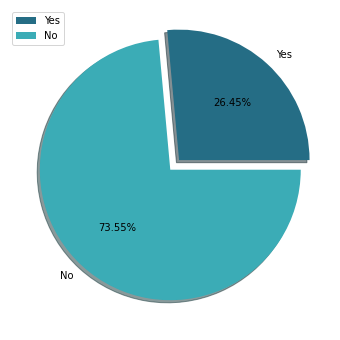

In [19]:
plt.figure(figsize= (10, 6))
labels = ["Yes", "No"]
explode = [0.1, 0]
plt.pie(df_clean['Churn'].value_counts(ascending=True) ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['#256D85', '#3BACB6'])
plt.legend()
plt.show()

Dari hasil grafik, terlihat bahwa data pelanggan yang churn jauh lebih sedikit dibandingkan dengan data pelanggan yang tidak churn atau dapat dikatakan data target imbalance. Data kelas target yang imbalance dapat menghasilkan bias dan menurunkan performa model sehingga perlu adanya balancing data target pada proses preprocessing.

Churn rate dari perusahaan Telco terbilang tinggi dengan nilai 26.45% dan diperlukan analisis lebih lanjut untuk mencari tahu penyebab pelanggan meninggalkan / tidak lagi menggunakan layanan dari Telco.

### IV.II EDA Categorical Data

Berikut ini adalah fungsi yang digunakan untuk membuat grafik

In [20]:
def cat_plots(dataframe, cat_col, target):
    print("".center(100, "#"))
    print(dataframe[cat_col].value_counts())
    print("".center(100, "#"))
    cat_feat_colors = ['#FFB6B9', '#FAE3D9', '#BBDED6', '#61C0BF', "#CCA8E9", "#F67280"]
    plt.figure(figsize=(15, 10))
    sns.set_style("whitegrid")
    plt.suptitle(cat_col.capitalize(), size=16)
    plt.subplot(1, 3, 1)
    plt.title("Percentages")
    plt.pie(dataframe[cat_col].value_counts().values.tolist(),
            labels=dataframe[cat_col].value_counts().keys().tolist(),
            labeldistance=1.1,
            wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
            colors=cat_feat_colors,
            autopct='%1.0f%%')

    

    plt.subplot(1, 3, 2)
    plt.title("Countplot")
    sns.countplot(data=dataframe, x=cat_col, palette=cat_feat_colors)
    plt.xticks(rotation=60)
    plt.tight_layout(pad=3)

    ax = plt.subplot(1, 3, 3)
    cross = pd.crosstab(dataframe[cat_col], dataframe['Churn']).apply(lambda x: x/x.sum()*100, axis=1)
    cross.plot(kind='bar', ax=ax, stacked=True, rot=0, color=cat_feat_colors)
    plt.title(f"Percentages plot of {cat_col.capitalize()}")
    plt.xticks(rotation=60)
    plt.show(block=True)

#### IV.II.I Churn Berdasarkan Informasi Demografi

Membuat grafik untuk menganalisis informasi demografi

####################################################################################################
Male      3541
Female    3480
Name: Gender, dtype: int64
####################################################################################################


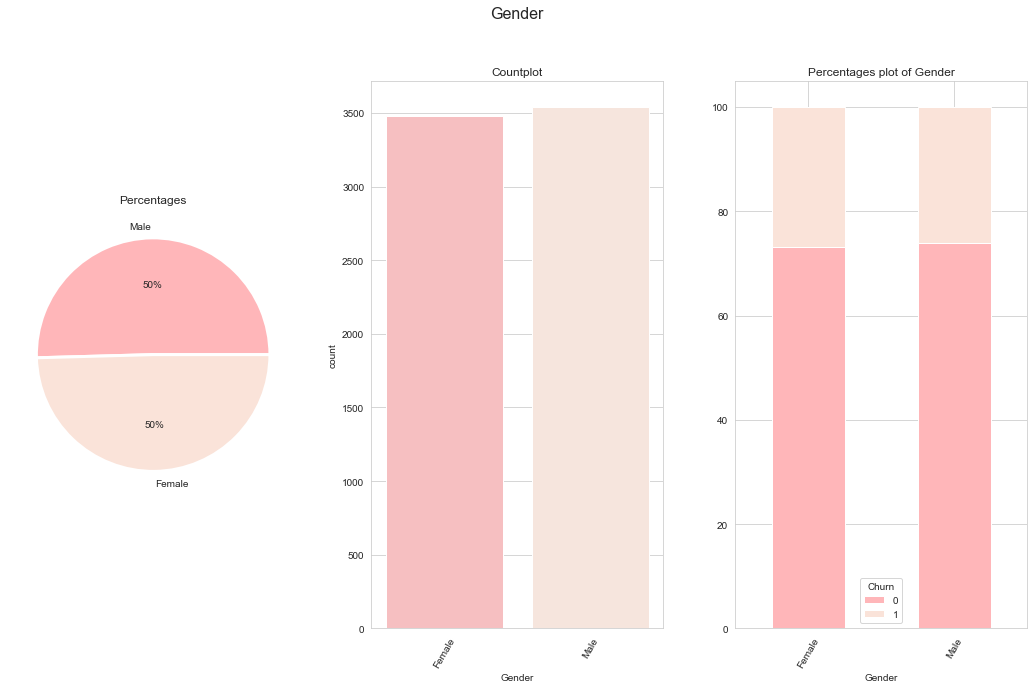

####################################################################################################
No     5880
Yes    1141
Name: SeniorCitizen, dtype: int64
####################################################################################################


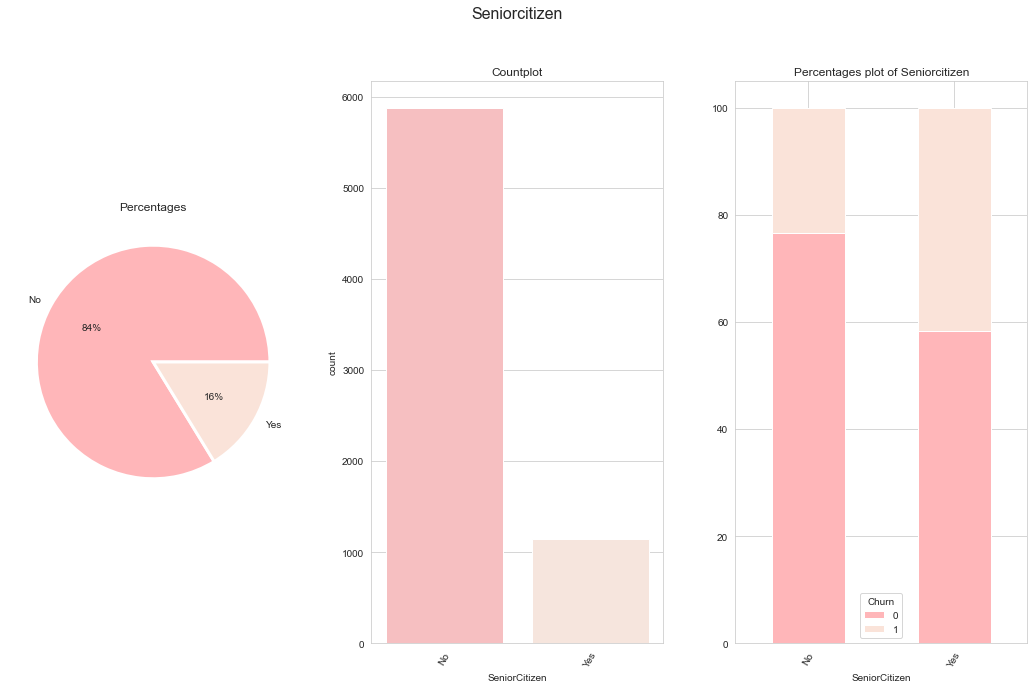

####################################################################################################
No     3619
Yes    3402
Name: Partner, dtype: int64
####################################################################################################


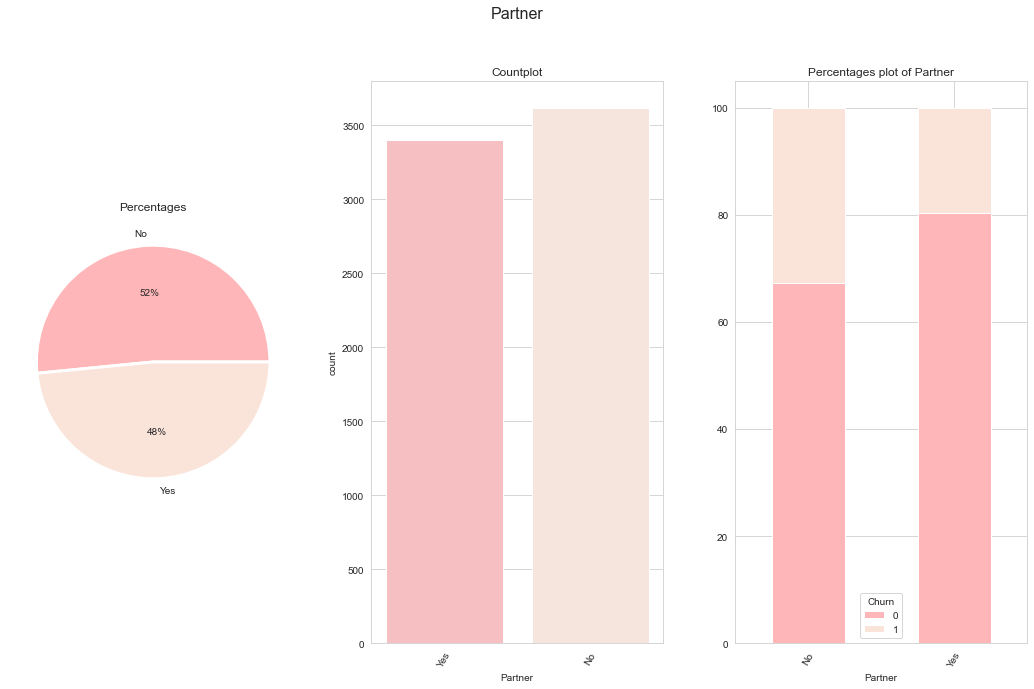

####################################################################################################
No     4911
Yes    2110
Name: Dependents, dtype: int64
####################################################################################################


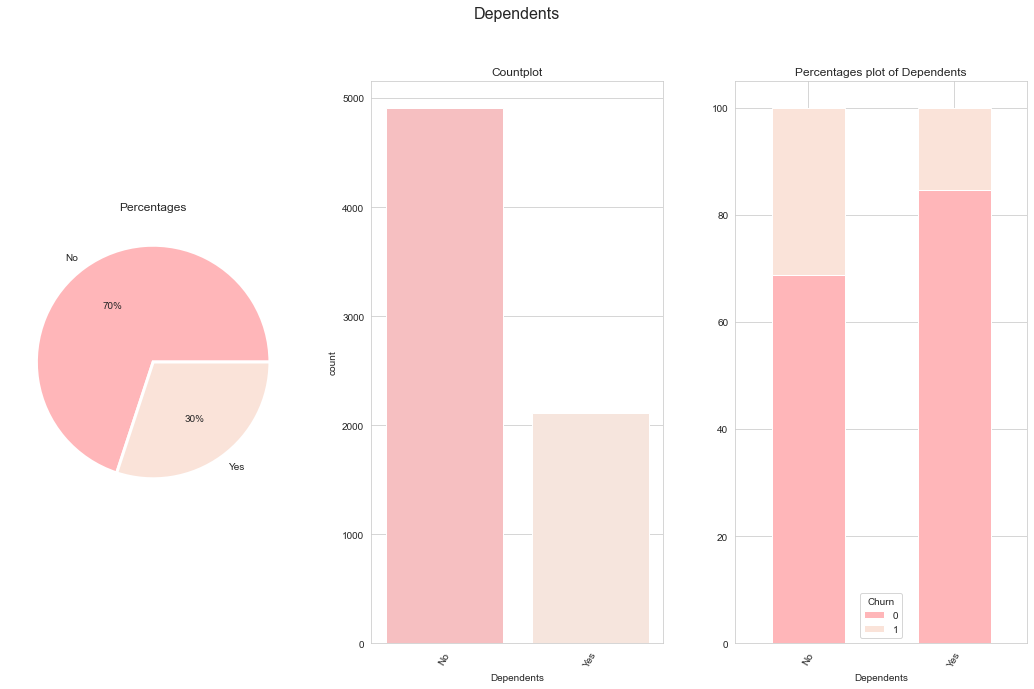

In [21]:
info_demog = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents']
for col in info_demog:
    cat_plots(df_clean, col, "Churn")

Dari data demografi pelanggan,
- Kolom `Gender` menyatakan apakah pelanggan pria (male) atau wanita (female). Dari grafik pie, terlihat bahwa proporsi pelanggan pria dan wanita sama dan bila melihat data churn, jumlah yang churn dari pelanggan pria dan wanita relatif sama. karena itu, data gender tidak bisa menentukan apakah pelanggan akan churn atau tidak.
- Kolom `Seniorcitizen` menyatakan apakah pelanggan memiliki usia di atas 55 tahun (Yes) atau tidak (No). Dari grafik pie, terlihat bahwa kebanyakan pelanggan memiliki umur di bawah 55 tahun (bukan senior citizen) dengan persentase 84%. Bila melihat dari data churn nya, pelanggan senior citizen (yang umurnya di atas 55 tahun) memiliki persentase lebih tinggi (hampir dua kali lipat) dari persentase churn pelanggan yang bukan senior citizen.
- Kolom `Partner` menyatakan apakah pelanggan memiliki pasangan atau tidak. Dari grafik pie, terlihat bahwa proporsi pelanggan yang memiliki pasangan dan tidak relatif sama jumlahnya. Pelanggan yang tidak memiliki pasangan, mempunyai tingkat churn lebih tinggi dari pelanggan yang memiliki pasangan.
- Kolom `Dependent` menyatakan apakah pelanggan tinggal bersama dengan orang lain (tanggungan) atau tidak. Kebanyakan pelanggan tidak tinggal bersama dengan tanggungan (sekitar 70%). Bila melihat tingkat churn, pelanggan yang tidak tinggal bersama tanggungan memiliki tingkat churn yang lebih tinggi.

#### IV.II.II Churn Berdasarkan Informasi Akun

Membuat grafik untuk menganalisis informasi akun pelanggan

####################################################################################################
Month-to-month    3853
Two year          1695
One year          1473
Name: Contract, dtype: int64
####################################################################################################


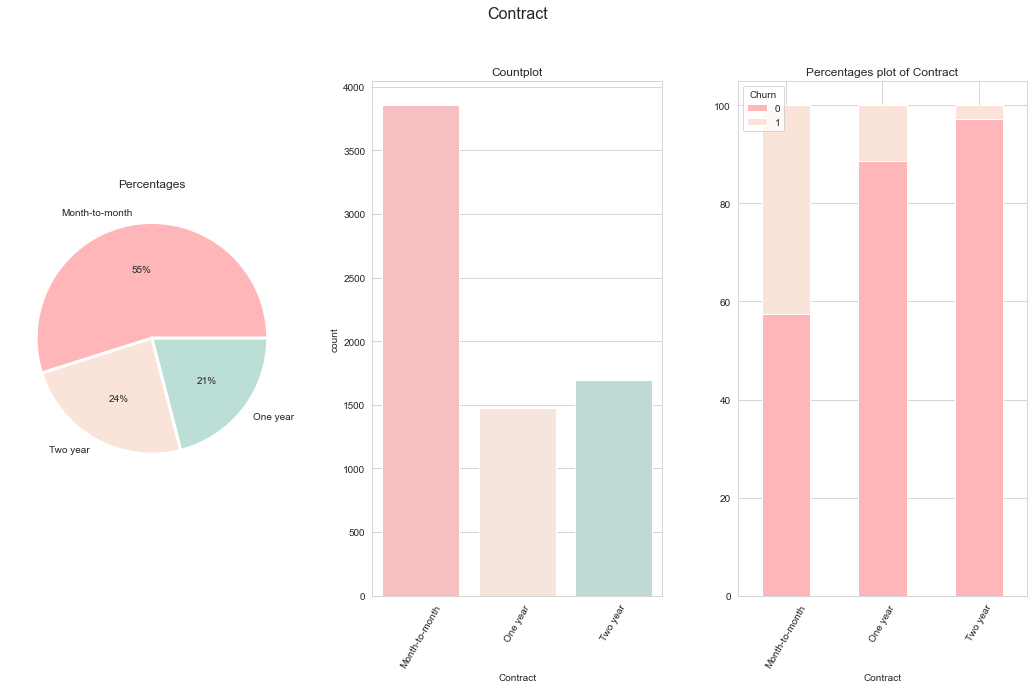

####################################################################################################
Yes    4161
No     2860
Name: PaperlessBilling, dtype: int64
####################################################################################################


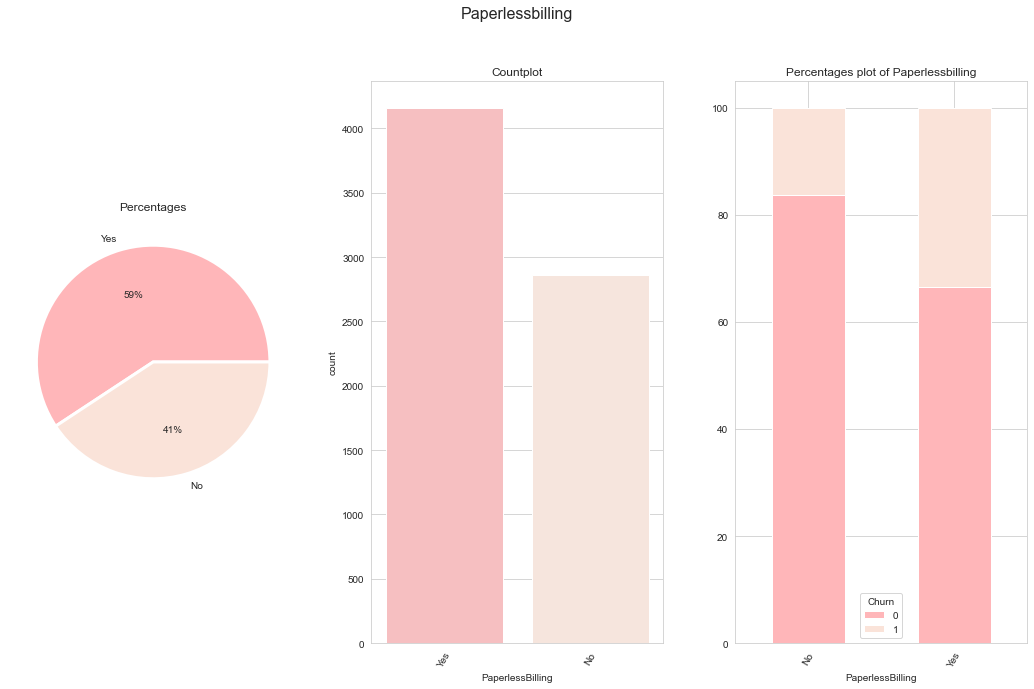

####################################################################################################
Electronic check             2359
Mailed check                 1596
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
####################################################################################################


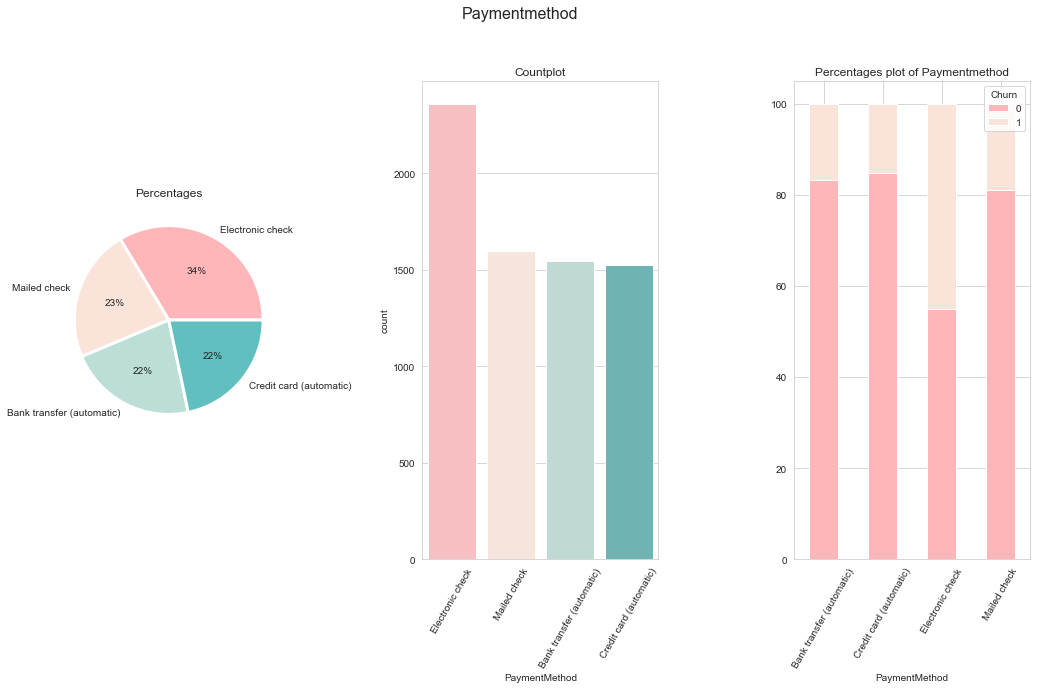

In [22]:
info_akun = ['Contract', 'PaperlessBilling', 'PaymentMethod']
for col in info_akun:
    cat_plots(df_clean, col, "Churn")

Berdasarkan informasi akun pelanggan,
- Kolom `Contract` menjelaskan kontrak tipe layanan apakah **Month-to-month** (melakukan pembaharuan kontrak setiap bulan), **One year** (melakukan pembaharuan kontrak setiap 1 tahun sekali), **Two year** (melakukan pembaharuan kontrak setiap 2 tahun sekali). Dari grafik pie, terlihat bahwa kebanyakan pelanggan memilih kontrak **Month-to-month**. Persentase pelanggan yang memilih kontrak **One year** dan **Two year** relatif sama. Bila melihat tingkat churn, pelanggan yang memiliki kontrak **Month-to-month** memiliki persentase churn yang lebih tinggi kemudian dikuti oleh pelanggan yang memiliki kontrak **One year** dan pelanggan yang memiliki persentase churn terendah adalah yang memilih kontrak **Two year**. Dapat dikatakan semakin lama kontrak yang dipilih maka tingkat churn pelanggan akan semakin rendah.
- Kolom `Paperlessbilling` menjelaskan apakah pelanggan memilih paperless billing (Yes) atau tidak (No). Bila melihat proporsi pembagiannya, masih dapat dikatakan cukup imbang walaupun pelanggan yang memilih paperless billing memiliki persentase yang lebih tinggi (59%). Bila melihat tingkat churn, pelanggan yang memilih paperless billing memiliki persentase churn yang lebih tinggi.
- Kolom `Paymentmethod` menjelaskan jenis metode pembayaran yang dipilih oleh pelanggan. Bila melihat proporsi pembagiannya, masih dapat dikatakan setiap jenis metode pembayaran memiliki proporsi yang seimbang. Bila melihat tingkat churn, pelanggan yang memilih metode **Electronic check** memiliki persentase churn yang sangat tinggi mendekati 50%.

#### IV.II.III Churn Berdasarkan Service yang dipilih pelanggan

####################################################################################################
Yes    6339
No      682
Name: PhoneService, dtype: int64
####################################################################################################


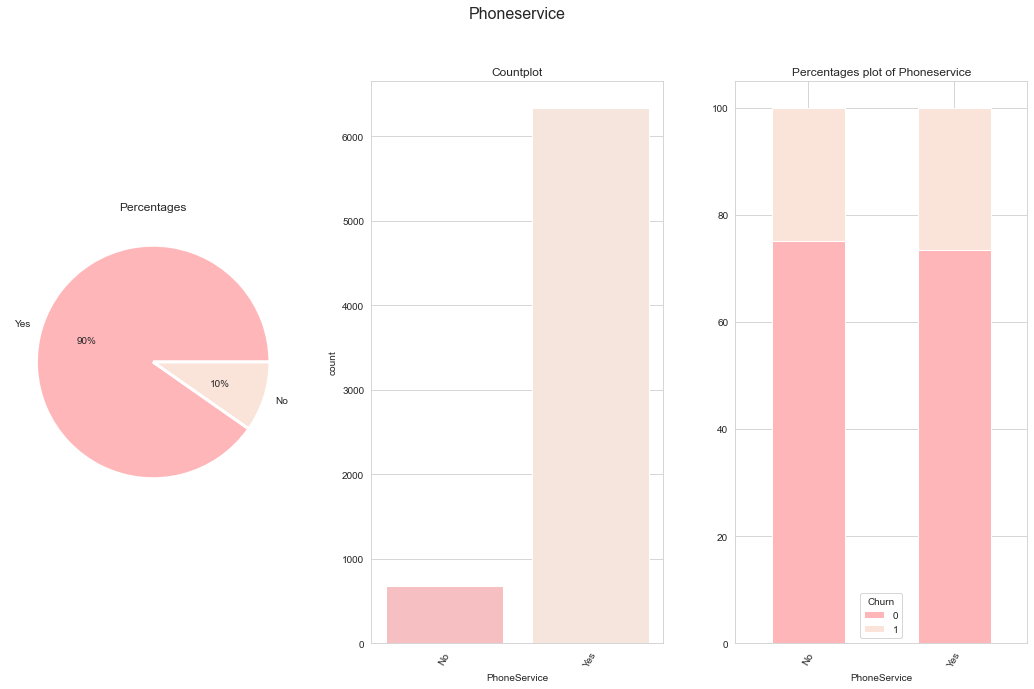

####################################################################################################
No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
####################################################################################################


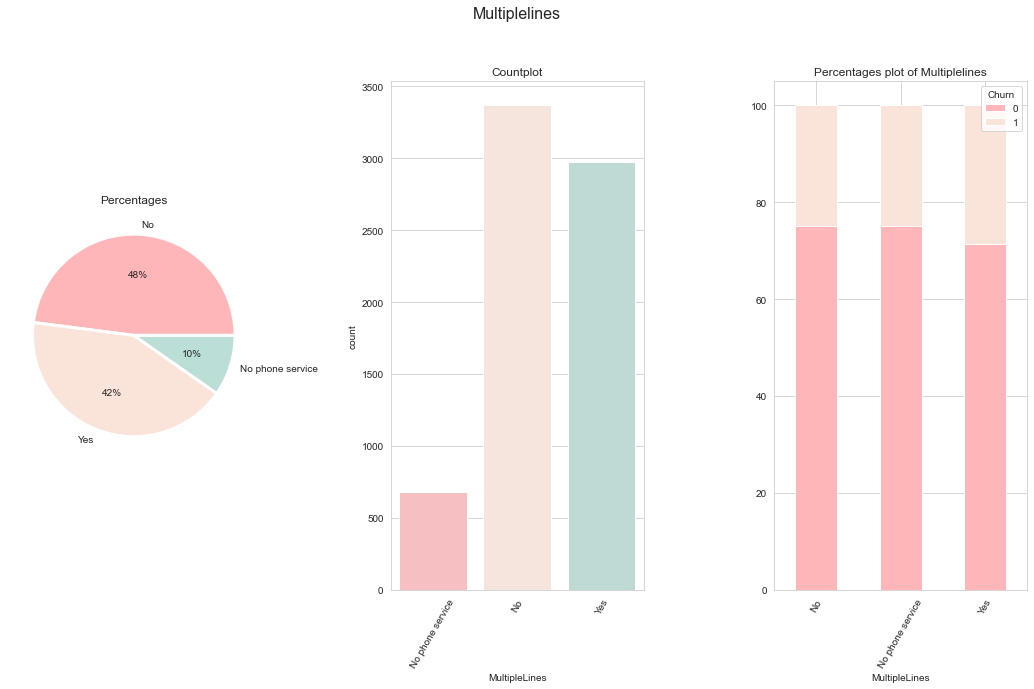

####################################################################################################
Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64
####################################################################################################


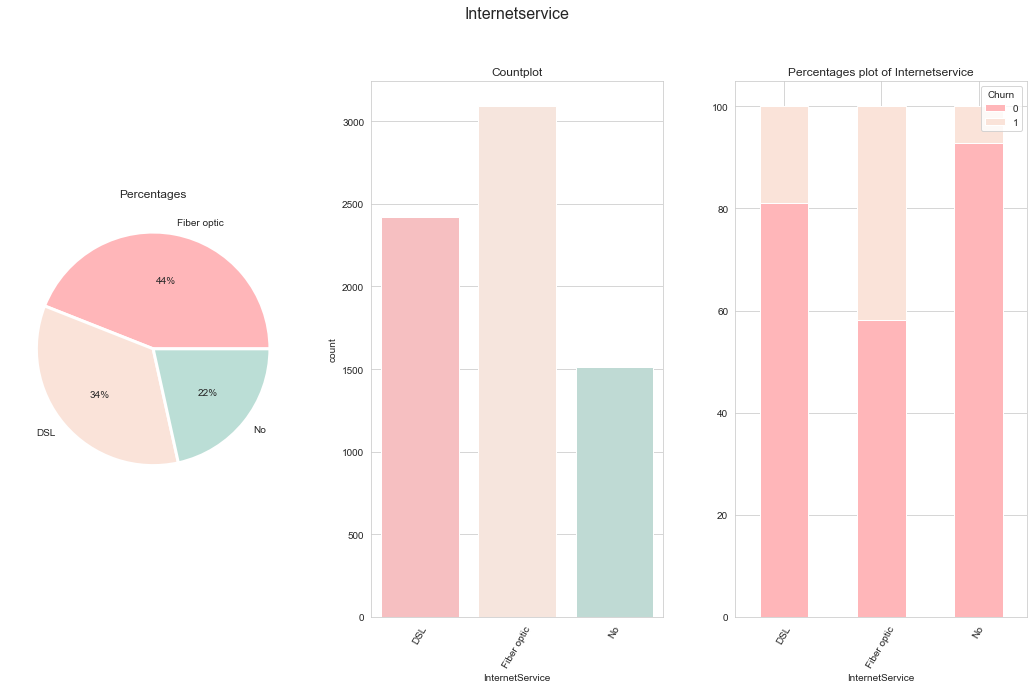

####################################################################################################
No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64
####################################################################################################


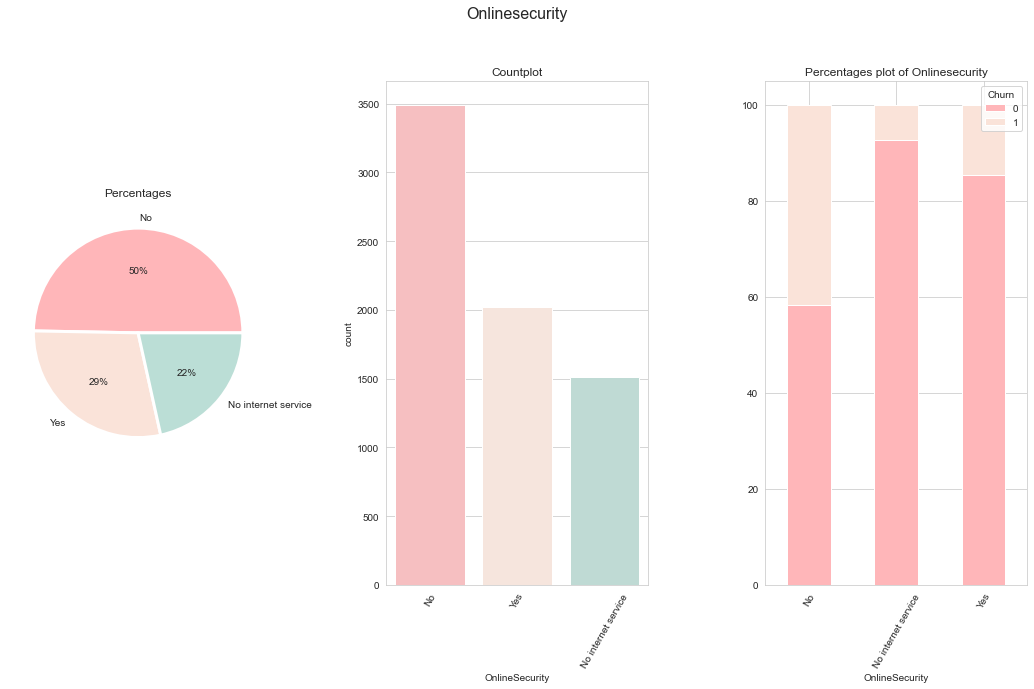

####################################################################################################
No                     3080
Yes                    2429
No internet service    1512
Name: OnlineBackup, dtype: int64
####################################################################################################


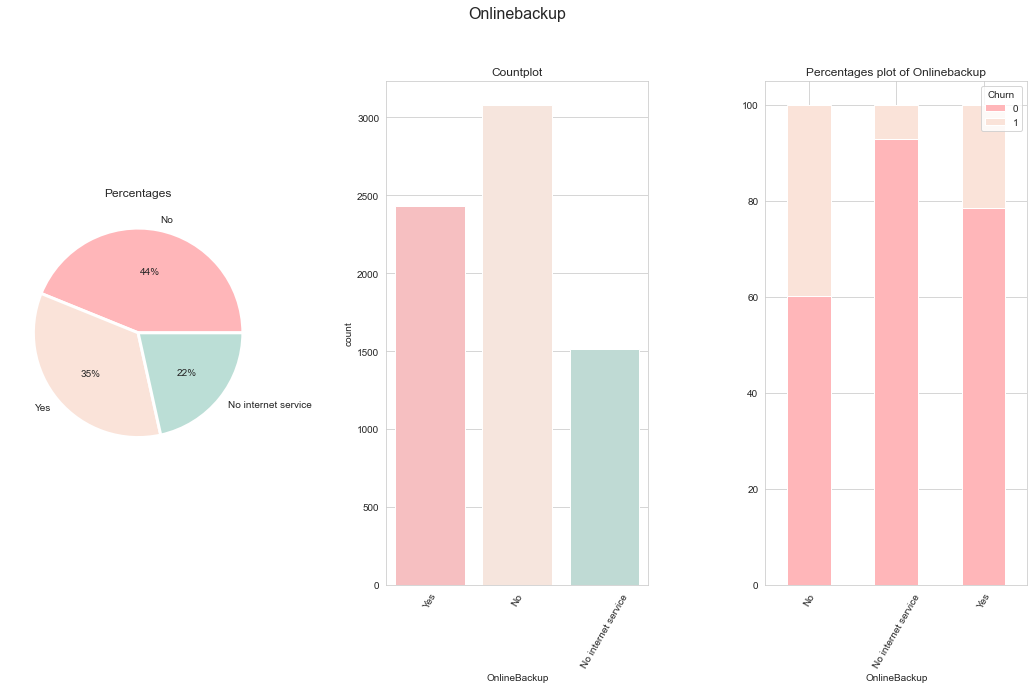

####################################################################################################
No                     3087
Yes                    2422
No internet service    1512
Name: DeviceProtection, dtype: int64
####################################################################################################


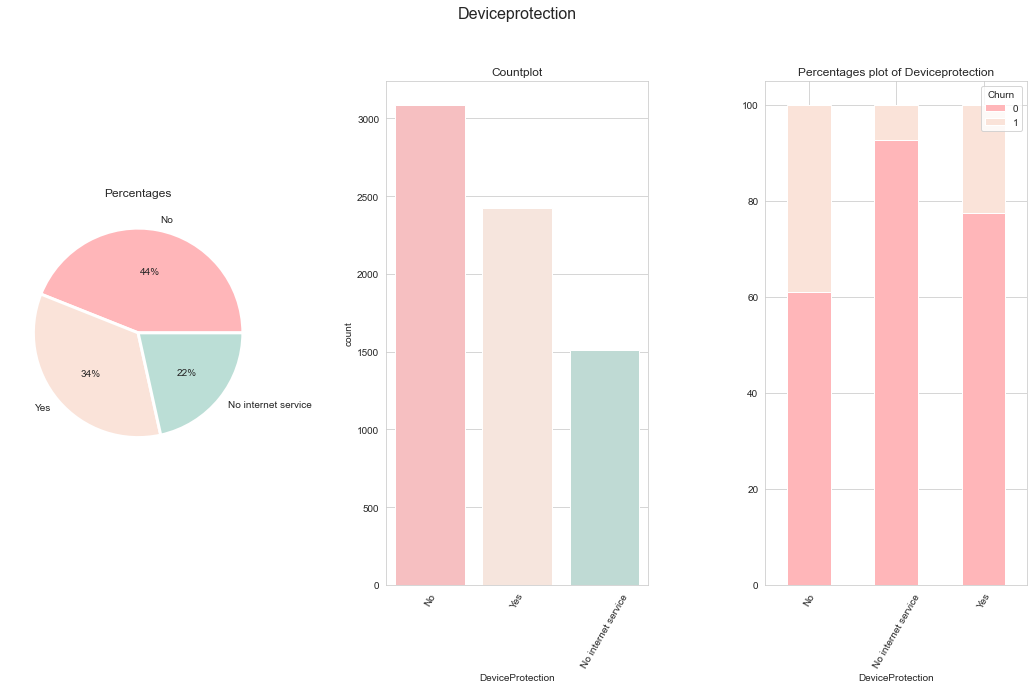

####################################################################################################
No                     3465
Yes                    2044
No internet service    1512
Name: TechSupport, dtype: int64
####################################################################################################


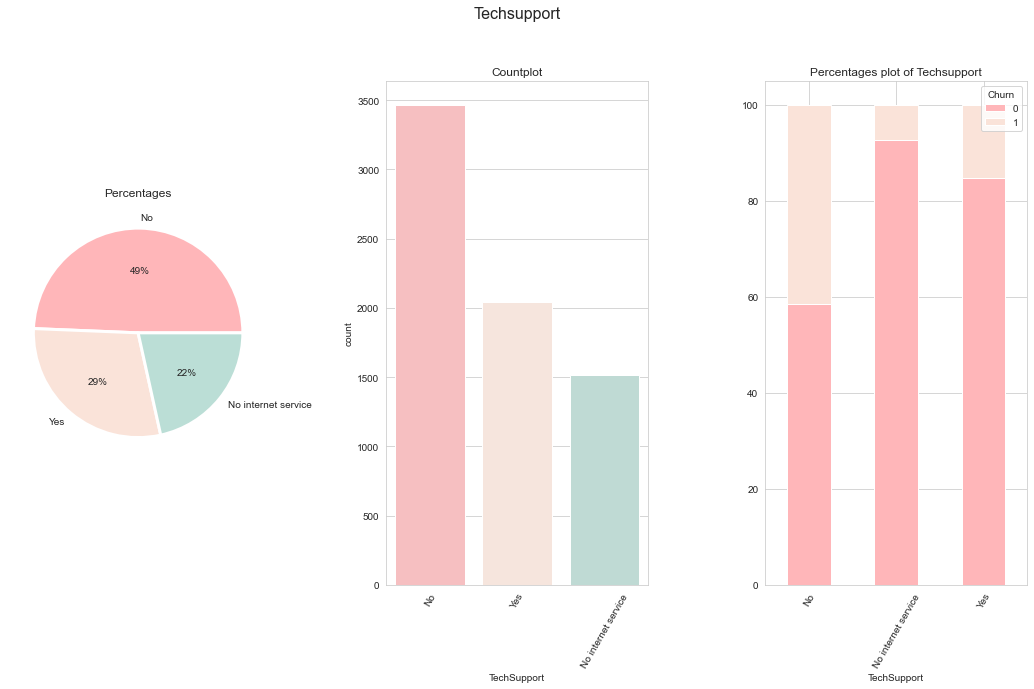

####################################################################################################
No                     2802
Yes                    2707
No internet service    1512
Name: StreamingTV, dtype: int64
####################################################################################################


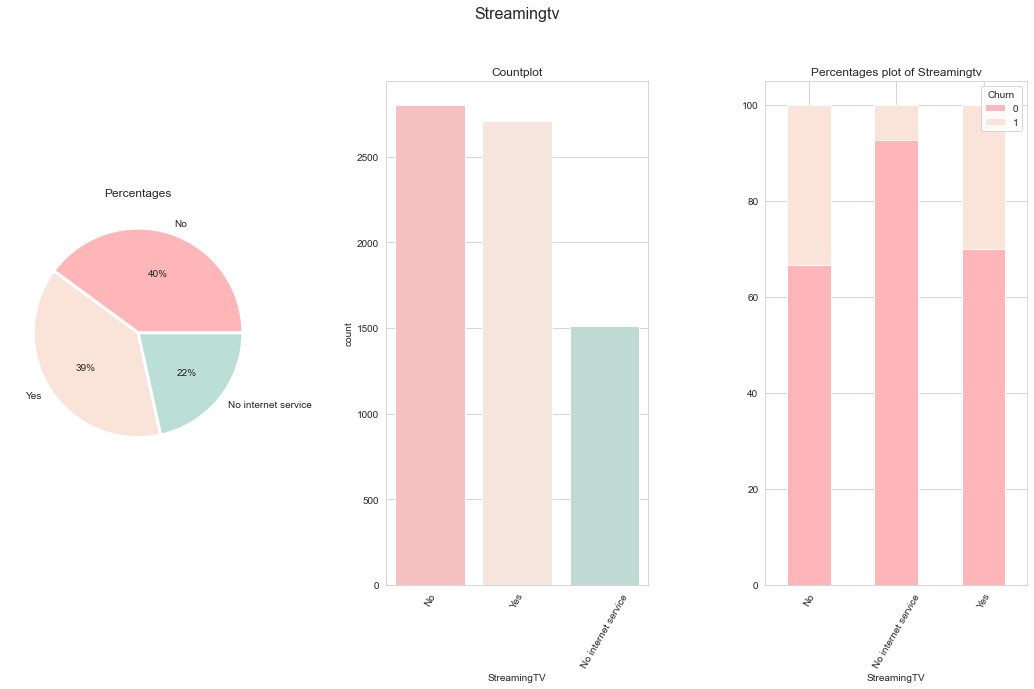

####################################################################################################
No                     2777
Yes                    2732
No internet service    1512
Name: StreamingMovies, dtype: int64
####################################################################################################


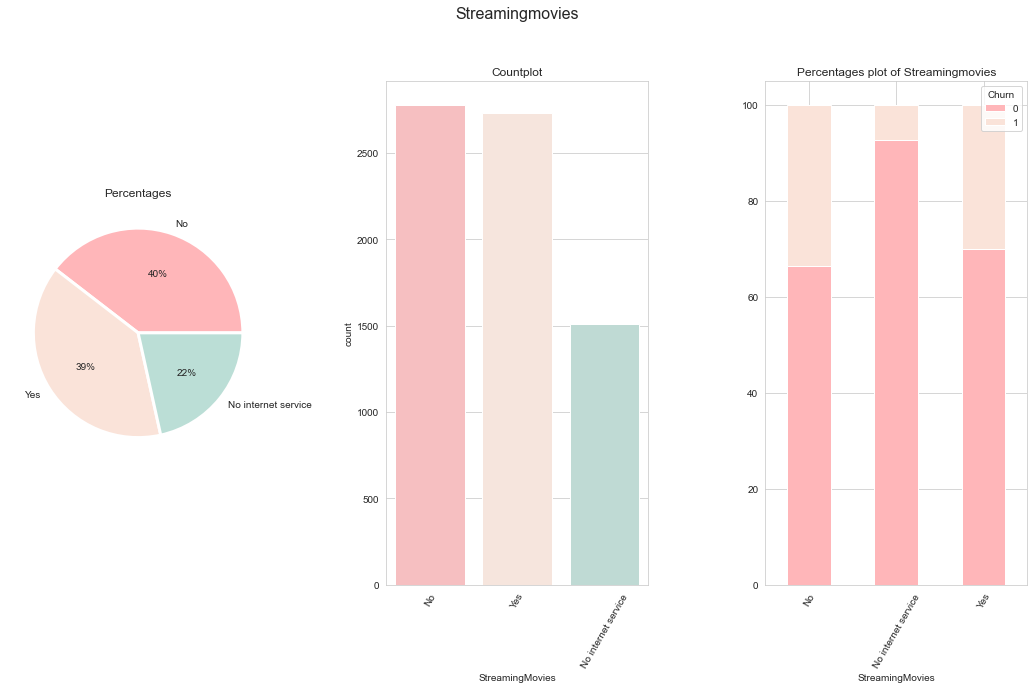

In [23]:
info_servis = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in info_servis:
    cat_plots(df_clean, col, "Churn")

Berdasarkan informasi service yang dipilih oleh pelanggan,
- `Phoneservice`, 90% pelanggan memilih untuk menggunakan layanan telefon dari Telco. Bila melihat dari tingkat churn, pelanggan yang menggunakan layanan telefon dan tidak memiliki persentase churn yang relatif sama.
- `Multiplelines`, proporsi antara pelanggan yang menggunakan layanan ini dan tidak dapat dikatakan seimbang. Bila melihat dari tingkat churn, pelanggan yang menggunakan layanan Multiplelines dan tidak memiliki persentase churn yang relatif sama.
- `Internetservice`, pelanggan lebih cenderung memilih layanan internet berupa **Fiber optic**. Bila melihat tingkat churn, pelanggan yang menggunakan layanan internet **Fiber optic** tertinggi dibanding layanan internet lain. Hal ini mungkin dikarenakan adanya perusahan kompetitor yang menyediakan layanan internet **Fiber optic** yang lebih baik.
- `OnlineSecurity`, pelanggan cenderung tidak menggunakan layanan tambahan berupa keamanan cyber. Bila melihat tingkat churn, pelanggan yang tidak menggunakan layanan ini memiliki persentase churn yang lebih tinggi
- `Onlinebackup`, pelanggan cenderung untuk tidak menggunakan layanan ini. Pelanggan yang tidak menggunkaan layanan ini memiliki tingkat churn yang lebih tinggi dibandingkan pelanggan lainnya.
- `Deviceprotection`, bila melihat pada pelanggan yang menggunakan layanan  internet, pelanggan dapat terbilang seimbang datanya antara yang menggunakan layanan tambahan ini atau tidak. Dan bila melihat dari tingkat churn, pelanggan yang tidak menggunakan layanan ini memiliki persentase churn yang lebih tinggi.
- `Techsupport`, bila melihat pada pelanggan yang menggunakan layanan internet, pelanggan cenderung tidak menggunakan layanan tambahan ini. Dari data churn, terlihat bahwa pelanggan yang tidak menggunakan layanan tambahan ini memiliki persentase churn yang lebih tinggi.
- `Streamingtv`, bila melihat pada pelanggan yang menggunakan layanan internet, pelanggan dapat terbilang seimbang datanya antara yang menggunakan layanan tambahan ini atau tidak. Bila melihat dari data churn, persentase churn relatif seimbang antara pelanggan yang menggunakan layanan streaming tv dan tidak (pada pelanggan yang menggunakan layanan internet).
- `Streamingmovies`, bila melihat pada pelanggan yang menggunakan layanan internet, pelanggan dapat terbilang seimbang datanya antara yang menggunakan layanan tambahan ini atau tidak. Bila melihat dari data churn, persentase churn relatif seimbang antara pelanggan yang menggunakan layanan streaming movies dan tidak (pada pelanggan yang menggunakan layanan internet).

### IV.III Data Engineering

Melihat nilai unique dari setiap kolom kategorik

In [24]:
for col in cat_col:
  print(col, '\n')
  print(df_clean[col].unique())
  print('\n')

Gender 

['Female' 'Male']


SeniorCitizen 

['No' 'Yes']


Partner 

['Yes' 'No']


Dependents 

['No' 'Yes']


PhoneService 

['No' 'Yes']


MultipleLines 

['No phone service' 'No' 'Yes']


InternetService 

['DSL' 'Fiber optic' 'No']


OnlineSecurity 

['No' 'Yes' 'No internet service']


OnlineBackup 

['Yes' 'No' 'No internet service']


DeviceProtection 

['No' 'Yes' 'No internet service']


TechSupport 

['No' 'Yes' 'No internet service']


StreamingTV 

['No' 'Yes' 'No internet service']


StreamingMovies 

['No' 'Yes' 'No internet service']


Contract 

['Month-to-month' 'One year' 'Two year']


PaperlessBilling 

['Yes' 'No']


PaymentMethod 

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']




Dari hasil diatas, pada kolom `MultipleLines` value **No phone service** akan diganti dengan value **No**. Value **No internet service** dari kolom `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, dan `StreamingMovies` akan diubah menjadi **No**. Pergantian value dilakukan karena value tersebut mengartikan hal yang sama.

In [25]:
df_clean['MultipleLines'] = df_clean['MultipleLines'].replace('No phone service', 'No')
df_clean['OnlineSecurity'] = df_clean['OnlineSecurity'].replace('No internet service', 'No')
df_clean['OnlineBackup'] = df_clean['OnlineBackup'].replace('No internet service', 'No')
df_clean['DeviceProtection'] = df_clean['DeviceProtection'].replace('No internet service', 'No')
df_clean['TechSupport'] = df_clean['TechSupport'].replace('No internet service', 'No')
df_clean['StreamingTV'] = df_clean['StreamingTV'].replace('No internet service', 'No')
df_clean['StreamingMovies'] = df_clean['StreamingMovies'].replace('No internet service', 'No')

Split data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_clean.drop(columns='Churn'), df_clean['Churn'], train_size=0.9, stratify=df_clean['Churn'])
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, train_size=0.8, stratify=y_train)

## V. EDA for Modeling

Menyiapkan data train untuk EDA modeling

In [27]:
EDA = pd.concat([X_train, y_train], axis=1)

### V.I Distribusi Feature Numerik

Membuat variabel feature numerik

In [28]:
feat_num = EDA[num_col]

Membuat grafik distribusi dari feature numerik

c:\Users\nawwa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\nawwa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\nawwa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

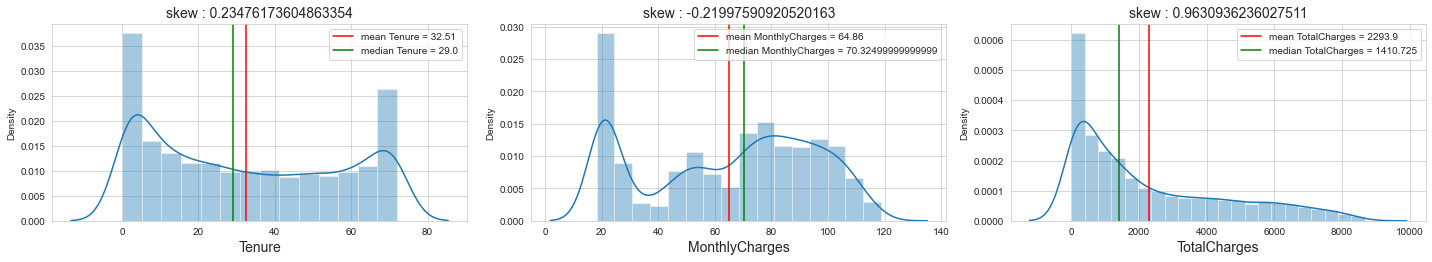

In [29]:
plt.figure(figsize=(20,10))

for idx, col in enumerate(feat_num):
        plt.subplot(3,3,idx+1)
        sns.distplot(feat_num[col])
        plt.title(f'skew : {feat_num[col].skew()}', fontsize=14)
        plt.axvline(x=feat_num[col].mean(), color='red', label=f'mean {col} = {round(feat_num[col].mean(), 2)}')
        plt.axvline(x=feat_num[col].median(), color='green', label=f'median {col} = {feat_num[col].median()}')
        plt.legend()
        plt.xlabel(f'{col}', fontsize=14)
        plt.tight_layout()

Dari grafik distribusi, `Tenure` dan `MonthlyCharges` memiliki distribusi normal sedangkan `TotalCharges` memiliki distribusi skew positif. 

Menampilkan 5 data feature numerik

In [30]:
feat_num.head()

,Tenure,MonthlyCharges,TotalCharges
5966,42,99.45,4138.05
6027,35,25.45,809.25
3641,49,74.45,3721.90
1855,46,20.10,936.85
550,72,110.30,7966.90


Bila melihat data diatas, nilai kolom `TotalCharges` terlihat seperti perkalian antara kolom `Tenure` dan `MonthlyCharges`. Untuk itu, perlu dilihat tingkat multikolinearitasnya.

### V.II Outliers Feature Numerik

Melihat persentase outliers dari setiap feature numerik.

In [31]:
def outlier_analysis(train,col):
  skewness = train[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = train[col].mean() + 3*train[col].std()
    lower = train[col].mean() - 3*train[col].std()
  elif (skewness>=-1 and skewness<=-0.5) or (skewness>=0.5 and skewness<=1):
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + (1.5*IQR)
    lower = Q1 - (1.5*IQR)
  else:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + (3*IQR)
    lower = Q1 - (3*IQR)
  
  # no_outliers = train[(train[col]>=lower) & (train[col]<=upper)]
  outliers = train[(train[col]<lower) | (train[col]>upper)]
  print('percentage outlier from',i,':',outliers.shape[0]/train.shape[0] * 100, '%', '  ', 'skew :', train[col].skew())
  return outliers, upper, lower

for i in list(feat_num.columns):
  outlier_analysis(feat_num,i)

percentage outlier from Tenure : 0.0 %    skew : 0.23476173604863354
percentage outlier from MonthlyCharges : 0.0 %    skew : -0.21997590920520163
percentage outlier from TotalCharges : 0.0 %    skew : 0.9630936236027511


Dari data diatas, terlihat bahwa pada feature numerik tidak terdapat data outliers.

### V.III Pengecekan Multikolinearitas Pada Feature Numerik

In [32]:
# the independent variables set
X = EDA[num_col]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

          feature       VIF
0          Tenure  6.315717
1  MonthlyCharges  3.385362
2    TotalCharges  8.073274


Dari hasil di atas, terlihat bahwa `TotalCharges` dan `Tenure` memiliki keterkaitan (nilai VIF > 5). Dimana nilai `TotalCharges` adalah perkalian antara `Tenure` dan `MonthlyCharges`. Untuk itu, `TotalCharges` tidak akan digunakan.

Melihat nilai multikolinearitas bila feature `TotalCharges` tidak digunakan.

In [33]:
# the independent variables set
X = EDA[['Tenure', 'MonthlyCharges']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

          feature       VIF
0          Tenure  2.628667
1  MonthlyCharges  2.628667


Dari hasil diatas, terlihat bahwa kedua feature (`Tenure` dan `MonthlyCharges`) adalah feature yang saling independen.

Membuat list nama kolom feature numerical setelah pengecekan multikolinearitas

In [34]:
num_col_final = ['Tenure', 'MonthlyCharges']

### V.IV Categorical Feature

Membuat variabel feature kategorik.

In [35]:
feat_cat = EDA[cat_col]

### V.IV.I One Hot Encoding

Melakukan one hot encoding untuk feature `Paymentmethod`

In [36]:
ohe_list = ['PaymentMethod']
ohe_manual = OneHotEncoder(sparse=False)
encoded = ohe_manual.fit_transform(feat_cat[ohe_list])
colum_encod = ohe_manual.get_feature_names_out(ohe_list)
feat_cat_encoded_ohe = pd.DataFrame(encoded, columns=colum_encod)

### V.IV.I Ordinal Encoding

Melakukan encoding pada feature `Gender`, `SeniorCitizen`, `Partner`, `Dependent`, `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `Contract`, `PaperlessBilling`.

In [37]:
ord_list = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling']
gd_cat = ['Female', 'Male']
sc_cat = ['No', 'Yes']
pr_cat = ['No', 'Yes']
dp_cat = ['No', 'Yes']
ps_cat = ['No', 'Yes']
mp_cat = ['No', 'Yes']
ints_cat = ['No', 'DSL', 'Fiber optic']
ons_cat = ['No', 'Yes']
onb_cat = ['No', 'Yes']
devp_cat = ['No', 'Yes']
ts_cat = ['No', 'Yes']
stv_cat = ['No', 'Yes']
smv_cat = ['No', 'Yes']
ct_cat = ['Month-to-month', 'One year', 'Two year']
pap_cat = ['No', 'Yes']

ord_manual = OrdinalEncoder(categories=[gd_cat, sc_cat, pr_cat, dp_cat, ps_cat, mp_cat, ints_cat, ons_cat, onb_cat, devp_cat, ts_cat, stv_cat, smv_cat, ct_cat, pap_cat])
enc_ord = ord_manual.fit_transform(feat_cat[ord_list])
feat_cat_encoded_ord = pd.DataFrame(enc_ord, columns=ord_list)

Menampilkan hasil ordinal encoding 

In [38]:
feat_cat_encoded_ord

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling
0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
1,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0
3,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
4,1.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5049,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5050,0.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5051,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5052,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0


Menyatukan feature numerik dan kategorik yang telah di encoding

In [39]:
feat_encoded_concat = pd.concat([EDA[num_col].reset_index(drop=True), feat_cat_encoded_ohe, feat_cat_encoded_ord], axis=1)

### V.V Feature Selection: Numerical

Feature numerical akan dilakukan seleksi dengan menggunakan korelasi kendall

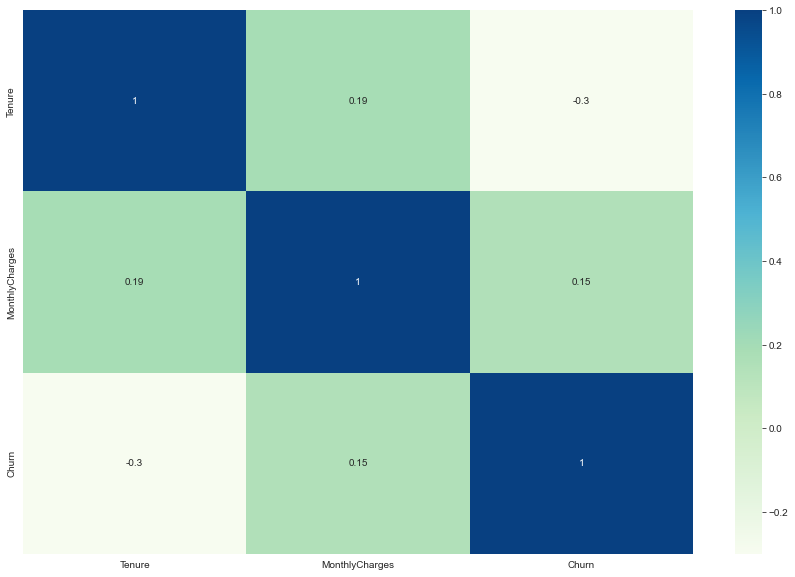

In [40]:
kor_feat = feat_encoded_concat[num_col_final].copy()
kor_feat['Churn'] = EDA['Churn'].reset_index(drop=True)
plt.figure(figsize=(15, 10))
sns.heatmap(round(kor_feat.corr(method='kendall'), 2), annot=True, mask=None, cmap='GnBu')
plt.show()

Dari hasil korelasi diatas, feature `Tenure` memiliki korelasi negatif dan feature `MonthlyCharges` memiliki korelasi positif. Kedua fature ini akan digunakan pada modeling ANN.

### V.V Feature Selection: Categorical

Melihat apakah feature kategorik memiliki hubungan dengan target melalui chi2 test.

In [41]:
cat_final = []
chi_list = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for col in chi_list:
    contingency_table = pd.crosstab(EDA[col], EDA["Churn"])
    stat, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(col)
    print('p=%f' % (p))
    if p > 0.05:
        print('Probably independent')
    else:
        print('Probably dependent')
        cat_final.append(col)
    print('\n')

Gender
p=0.108350
Probably independent


SeniorCitizen
p=0.000000
Probably dependent


Partner
p=0.000000
Probably dependent


Dependents
p=0.000000
Probably dependent


PhoneService
p=0.561615
Probably independent


MultipleLines
p=0.023180
Probably dependent


InternetService
p=0.000000
Probably dependent


OnlineSecurity
p=0.000000
Probably dependent


OnlineBackup
p=0.000000
Probably dependent


DeviceProtection
p=0.000005
Probably dependent


TechSupport
p=0.000000
Probably dependent


StreamingTV
p=0.000001
Probably dependent


StreamingMovies
p=0.000002
Probably dependent


Contract
p=0.000000
Probably dependent


PaperlessBilling
p=0.000000
Probably dependent


PaymentMethod
p=0.000000
Probably dependent




Dari hasil di atas, kolom `Gender` dan `PhoneService` tidak memiliki hubungan dengan target sehingga kolom ini akan didrop.

Melakukan chi2 test pada kolom kategorik yang diencoding menggunakan teknik ordinal.

In [42]:
chi2_test = SelectKBest(score_func=chi2)
fit = chi2_test.fit(feat_encoded_concat[ord_list], EDA['Churn'].reset_index(drop=True))
result = pd.DataFrame(fit.scores_, index=feat_encoded_concat[ord_list].columns, columns=['Chi2_SCORE'])
result.sort_values(by='Chi2_SCORE', ascending=False)

,Chi2_SCORE
Contract,793.701102
InternetService,251.133095
OnlineSecurity,128.218603
Dependents,104.703278
TechSupport,95.820682
SeniorCitizen,87.416804
PaperlessBilling,71.896231
Partner,60.393815
OnlineBackup,26.992903
StreamingTV,15.565534


Dari hasil chi2 score di atas, saya menetapkan threshold 50 sehingga feature yang memiliki nilai diatas 50 akan dipilih.

Membuat nama list kolom kategorik yang terpilih

In [43]:
ordinal_list_selected = ['SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaperlessBilling']
ohe_list_selected = ['PaymentMethod']

## VI. Preprocessing

### VI.I Preprocessing

Membuat pipiline untuk encoding ordinal

In [44]:
cat_1_pipeline = Pipeline([
        ('ordinal_enc', OrdinalEncoder(categories=[sc_cat, pr_cat, dp_cat, ints_cat, ons_cat, ts_cat, ct_cat, pap_cat]))
    ])

Membuat pipiline untuk encoding onehot

In [45]:
cat_2_pipeline = Pipeline([
        ('ohe_enc', OneHotEncoder(sparse=False, handle_unknown='ignore'))
    ])

Membuat pipeline untuk scaling

In [46]:
num_pipeline = Pipeline([
        ('scaler', StandardScaler())
    ])

Menggabungkan pipeline seluruh langkah preprocessing

In [47]:
prep_pipeline = ColumnTransformer([
        ("num_1", num_pipeline, ['Tenure', 'MonthlyCharges']),
        ("cat_ord", cat_1_pipeline, ['SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity',
       'TechSupport', 'Contract', 'PaperlessBilling']),
        ("cat_ohe", cat_2_pipeline, ['PaymentMethod'])
    ])

Melakukan fit dan transform pada data feature train

In [48]:
X_train_pipe = prep_pipeline.fit_transform(X_train)

Melakukan transform pada data feature validasi

In [49]:
X_val_pipe = prep_pipeline.transform(X_val)

melakukan transform pada data feature test

In [50]:
X_test_pipe = prep_pipeline.transform(X_test)

### VI.II Data balancing

Melihat hasil data feature train setelah dilakukan preprocessing untuk menentukan kolom kategorik

In [51]:
pd.DataFrame(X_train_pipe)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.386448,1.147624,0.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.101335,-1.307297,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0
2,0.671562,0.318259,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0
3,0.549370,-1.484781,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0
4,1.608364,1.507569,0.0,1.0,1.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5049,-1.283503,0.326553,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5050,-0.265240,0.694791,1.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5051,-1.283503,-1.517956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5052,1.323250,0.374656,0.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0


dari hasil diatas, Kolom kategorik adalah kolom 2 hingga kolom 13

Dari data diatas, akan dilakukan balancing kelas target dengan menggunakan SMOTENC() dan dipilih teknik oversampling untuk menyeimbangkan data dimana data minoritas akan diperbanyak.

In [52]:
smnc = SMOTENC(categorical_features=[2,3,4,5,6,7,8,9,10,11,12,13],sampling_strategy='minority', random_state=33)

Melakukan resampling pada data train

In [53]:
X_train_resampled, y_train_resampled = smnc.fit_resample(X_train_pipe, y_train)

Menampilkan data setelah dilakukan resampling

In [54]:
pd.DataFrame(X_train_resampled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.386448,1.147624,0.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.101335,-1.307297,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0
2,0.671562,0.318259,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0
3,0.549370,-1.484781,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0
4,1.608364,1.507569,0.0,1.0,1.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7429,-1.283503,-1.488969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7430,-1.283503,0.232105,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7431,-1.221130,0.350350,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7432,-1.100801,0.926168,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Terlihat data semakin banyak karena telah dilakukan balancing dengan teknik oversampling.

Membuat Pipeline TensorFlow

In [55]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_resampled, y_train_resampled))
train_dataset = train_dataset.shuffle(buffer_size=5120, seed=1).batch(64)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_pipe, y_val))
val_dataset = val_dataset.batch(64)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_pipe, y_test))
test_dataset = test_dataset.batch(64)

## VII. Model

### VII.I Model Sequential

Membuat model Sequential ANN yang terdiri
1. Input Layer
2. Hidden Layer
3. Output Layer

In [56]:
#Jumlah neuron
n_neuron_seq1 = (25, 10)

#Sequential Model Architecture
model_seq1 = Sequential()

#Input Layer
n_feature = X_train_resampled.shape[1]
model_seq1.add(Input(shape=(n_feature, )))

#Hidden Layer
for n in n_neuron_seq1:
    model_seq1.add(Dense(n, activation='relu'))


#Output Layer
model_seq1.add(Dense(1, activation='sigmoid'))

#Compiling Model
model_seq1.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

Menampilkan jumlah neuron yang digunakan

In [57]:
# Showing neuron
for n in n_neuron_seq1:
    print(n)

25
10


Menampilkan summary dari model ANN sequential

In [58]:
# Model summary
model_seq1.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                375       
                                                                 
 dense_1 (Dense)             (None, 10)                260       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 646
Trainable params: 646
Non-trainable params: 0
_________________________________________________________________


Menampilkan plot diagram alur pemodelan ANN sequential

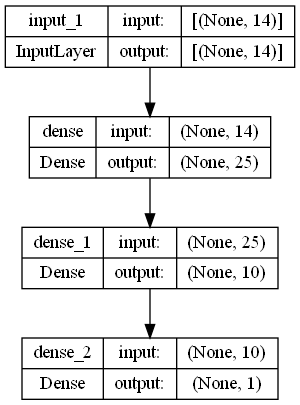

In [59]:
tf.keras.utils.plot_model(model_seq1, show_shapes=True, show_layer_names=True)

Melakukan training pada model ANN sequential

In [60]:
history=model_seq1.fit(train_dataset, validation_data=(val_dataset), epochs = 100)

Epoch 1/100
117/117 [==============================] - 2s 5ms/step - loss: 0.5531 - accuracy: 0.7541 - val_loss: 0.5469 - val_accuracy: 0.7263
Epoch 2/100
117/117 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.7778 - val_loss: 0.5382 - val_accuracy: 0.7255
Epoch 3/100
117/117 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.7803 - val_loss: 0.5394 - val_accuracy: 0.7326
Epoch 4/100
117/117 [==============================] - 0s 2ms/step - loss: 0.4650 - accuracy: 0.7798 - val_loss: 0.5129 - val_accuracy: 0.7429
Epoch 5/100
117/117 [==============================] - 0s 2ms/step - loss: 0.4608 - accuracy: 0.7845 - val_loss: 0.5325 - val_accuracy: 0.7302
Epoch 6/100
117/117 [==============================] - 0s 2ms/step - loss: 0.4590 - accuracy: 0.7858 - val_loss: 0.5295 - val_accuracy: 0.7358
Epoch 7/100
117/117 [==============================] - 0s 2ms/step - loss: 0.4577 - accuracy: 0.7832 - val_loss: 0.5174 - val_accuracy: 0.7405

Menampilkan akurasi dan loss dari ANN sequential

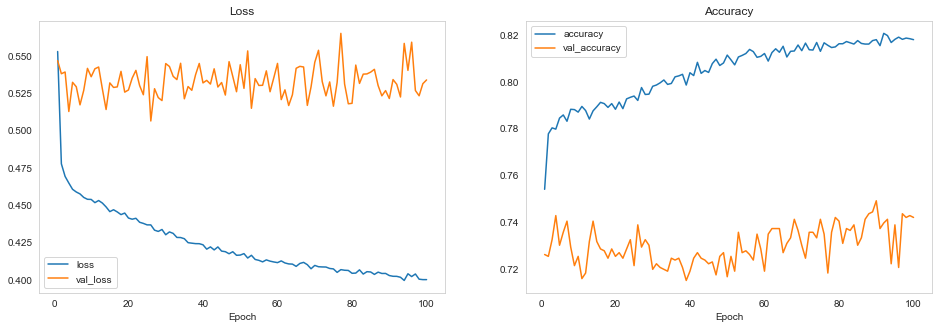

In [61]:
epoch=100

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].grid()
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].grid()
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

Dari grafik diatas, terlihat adanya gradien exploding. Untuk itu, perlu dilakukan improvement pada model.

### VII.II Model Improvement : Sequential

Melakukan improvement pada model sequential ANN dengan menambahkan regularizer, Batch Normalisasi, initializer, serta memperkecil learning rate dari optimezer.

In [62]:
#Jumlah neuron
n_neuron_seq2 = (25, 10)

#Sequential Model Architecture
model_seq2 = Sequential()

#Input Layer
n_feature = X_train_resampled.shape[1]
model_seq2.add(tf.keras.layers.Dense(n_feature, activation='relu', input_shape=(n_feature, ), kernel_initializer='HeNormal', kernel_regularizer='l2'))
model_seq2.add(tf.keras.layers.BatchNormalization())

#Hidden Layer
for n in n_neuron_seq2:
    model_seq2.add(Dense(n, activation='relu'))
    model_seq2.add(tf.keras.layers.BatchNormalization())
   

#Output Layer
model_seq2.add(Dense(1, activation='sigmoid'))

#Compiling Model
model_seq2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

Menampilkan jumlah neuron

In [63]:
# Showing neuron
for n in n_neuron_seq2:
    print(n)

25
10


Menampilkan summary dari model ANN setelah improvement

In [64]:
# Model summary
model_seq2.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 14)                210       
                                                                 
 batch_normalization (BatchN  (None, 14)               56        
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 25)                375       
                                                                 
 batch_normalization_1 (Batc  (None, 25)               100       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 10)                260       
                                                                 
 batch_normalization_2 (Batc  (None, 10)              

Menampilkan alur ANN sequential setelah improvement

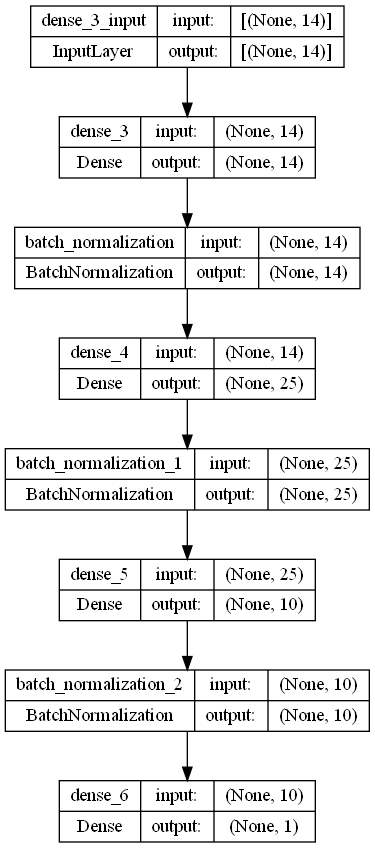

In [65]:
tf.keras.utils.plot_model(model_seq2, show_shapes=True, show_layer_names=True)

Melakukan training pada data set

In [66]:
history_2 = model_seq2.fit(train_dataset, validation_data=(val_dataset), epochs = 130)

Epoch 1/130
117/117 [==============================] - 3s 4ms/step - loss: 1.3103 - accuracy: 0.3970 - val_loss: 1.0175 - val_accuracy: 0.4399
Epoch 2/130
117/117 [==============================] - 0s 3ms/step - loss: 1.0783 - accuracy: 0.5295 - val_loss: 0.9607 - val_accuracy: 0.5712
Epoch 3/130
117/117 [==============================] - 0s 3ms/step - loss: 0.9622 - accuracy: 0.6073 - val_loss: 0.9048 - val_accuracy: 0.6464
Epoch 4/130
117/117 [==============================] - 0s 3ms/step - loss: 0.8981 - accuracy: 0.6618 - val_loss: 0.8763 - val_accuracy: 0.6780
Epoch 5/130
117/117 [==============================] - 0s 2ms/step - loss: 0.8556 - accuracy: 0.6885 - val_loss: 0.8568 - val_accuracy: 0.6946
Epoch 6/130
117/117 [==============================] - 0s 3ms/step - loss: 0.8256 - accuracy: 0.7097 - val_loss: 0.8353 - val_accuracy: 0.7104
Epoch 7/130
117/117 [==============================] - 0s 2ms/step - loss: 0.8046 - accuracy: 0.7207 - val_loss: 0.8220 - val_accuracy: 0.7223

Menampilkan grafik perubahan akurasi dan loss

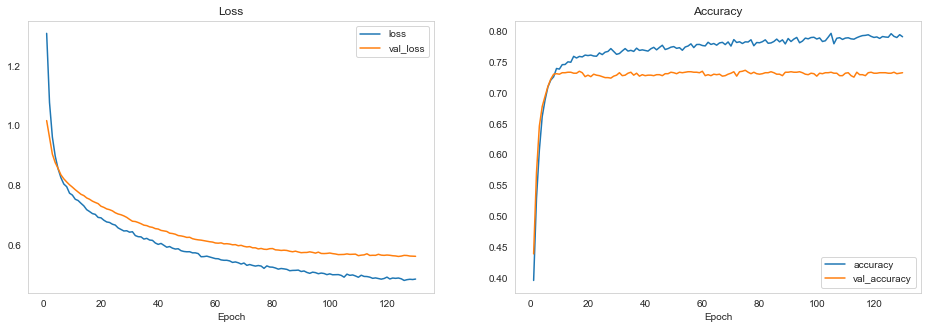

In [67]:
epoch=130

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_2.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history_2.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].grid()
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history_2.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history_2.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].grid()
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

Dari hasil diatas, terlihat bahwa model jauh lebih baik dimana gradien exploding sudah ditekan.

### VII.III Model Functional

Membuat model functional ANN

In [68]:
# Setting the neuron
n_neuronFunc = (25, 10)

# Input layer
data_in = Input(shape=(n_feature, )) # INPUT LAYER
hidden_n = data_in

# Hidden layer
for n in n_neuronFunc: # HIDDEN LAYER
    hidden_n = Dense(n, activation='relu')(hidden_n)

# Output Layer
data_out = Dense(1, activation='sigmoid')(hidden_n) 

# Model Functional
model_func = Model(inputs=data_in, outputs=data_out)

# Compile Model_Functional
model_func.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

Menampilkan jumlah neuron

In [69]:
# Showing neuron
for n in n_neuronFunc:
    print(n)

25
10


menampilkan summary

In [70]:
# Model summary
model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 14)]              0         
                                                                 
 dense_7 (Dense)             (None, 25)                375       
                                                                 
 dense_8 (Dense)             (None, 10)                260       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 646
Trainable params: 646
Non-trainable params: 0
_________________________________________________________________


Menampilkan alur ANN functional

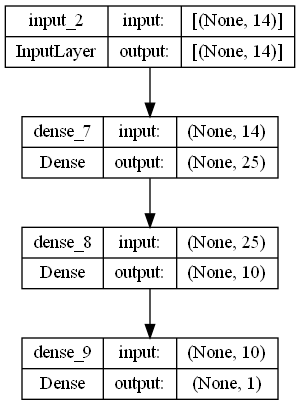

In [71]:
# Model plotting
tf.keras.utils.plot_model(model_func, show_shapes = True)

Melakukan training data set dengan ANN functional

In [72]:
historyFunc = model_func.fit(train_dataset, validation_data = (val_dataset), epochs = 100)

Epoch 1/100
117/117 [==============================] - 1s 3ms/step - loss: 0.6251 - accuracy: 0.6427 - val_loss: 0.6013 - val_accuracy: 0.6994
Epoch 2/100
117/117 [==============================] - 0s 2ms/step - loss: 0.4922 - accuracy: 0.7685 - val_loss: 0.5314 - val_accuracy: 0.7366
Epoch 3/100
117/117 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.7778 - val_loss: 0.5586 - val_accuracy: 0.7160
Epoch 4/100
117/117 [==============================] - 0s 2ms/step - loss: 0.4661 - accuracy: 0.7822 - val_loss: 0.5179 - val_accuracy: 0.7373
Epoch 5/100
117/117 [==============================] - 0s 2ms/step - loss: 0.4605 - accuracy: 0.7809 - val_loss: 0.5293 - val_accuracy: 0.7302
Epoch 6/100
117/117 [==============================] - 0s 2ms/step - loss: 0.4568 - accuracy: 0.7826 - val_loss: 0.5326 - val_accuracy: 0.7199
Epoch 7/100
117/117 [==============================] - 0s 2ms/step - loss: 0.4564 - accuracy: 0.7811 - val_loss: 0.5438 - val_accuracy: 0.7207

Menampilkan perubahan akurasi dan loss

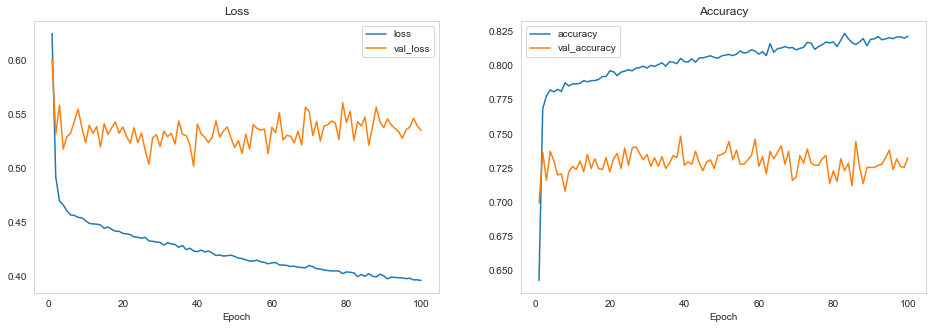

In [73]:
epoch=100

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),historyFunc.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),historyFunc.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].grid()
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),historyFunc.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),historyFunc.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].grid()
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

Dari hasil diatas, terlihat adanya gradien exploding sehingga perlu dilakukan improvement.

### VII.IV Model Improvement : Functional

Melakukan improvement pada model functional ANN dengan menambahkan regularizer, Batch Normalisasi, initializer, serta memperkecil learning rate dari optimezer.

In [74]:
# Setting the neuron
n_neuronFunc2 = (25, 10)

# Input layer
data_in2 = Input(shape=(n_feature, ))
hidden_n2 = tf.keras.layers.Dense(n_feature, activation='relu', kernel_initializer='HeNormal', kernel_regularizer='l2')(data_in2)
hidden_n2 = tf.keras.layers.BatchNormalization()(hidden_n2)

# Hidden layer
for n in n_neuronFunc2: # HIDDEN LAYER
    hidden_n2 = Dense(n, activation='relu')(hidden_n2)
    hidden_n2 = tf.keras.layers.BatchNormalization()(hidden_n2)

# Output Layer
data_out2 = Dense(1, activation='sigmoid')(hidden_n2) 

# Model Functional
model_func2 = Model(inputs=data_in2, outputs=data_out2)

# Compile Model_Functional
model_func2.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
    metrics=['accuracy']
)

Menampilkan jumlah neuron

In [75]:
# Showing neuron
for n in n_neuronFunc2:
    print(n)

25
10


Menampilkan summary dari Functional ANN setelah improvement

In [76]:
# Model summary
model_func2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 14)]              0         
                                                                 
 dense_10 (Dense)            (None, 14)                210       
                                                                 
 batch_normalization_3 (Batc  (None, 14)               56        
 hNormalization)                                                 
                                                                 
 dense_11 (Dense)            (None, 25)                375       
                                                                 
 batch_normalization_4 (Batc  (None, 25)               100       
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 10)                260 

Menampilkan alur Functional ANN setelah improvement

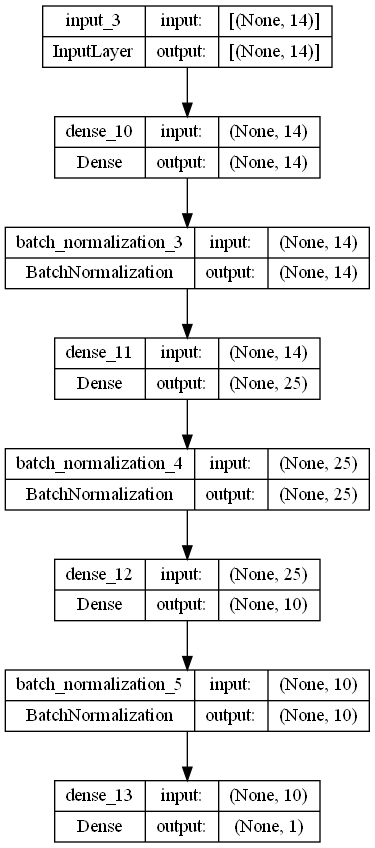

In [77]:
# Model plotting
tf.keras.utils.plot_model(model_func2, show_shapes = True)

Melakukan training data dengan improved functional ANN

In [78]:
historyFunc2 = model_func2.fit(train_dataset, validation_data = (val_dataset), epochs = 100)

Epoch 1/100
117/117 [==============================] - 3s 4ms/step - loss: 1.0855 - accuracy: 0.5424 - val_loss: 1.1380 - val_accuracy: 0.3299
Epoch 2/100
117/117 [==============================] - 0s 3ms/step - loss: 0.9815 - accuracy: 0.6068 - val_loss: 1.0182 - val_accuracy: 0.5316
Epoch 3/100
117/117 [==============================] - 0s 3ms/step - loss: 0.9117 - accuracy: 0.6568 - val_loss: 0.9286 - val_accuracy: 0.6250
Epoch 4/100
117/117 [==============================] - 0s 3ms/step - loss: 0.8696 - accuracy: 0.6807 - val_loss: 0.8766 - val_accuracy: 0.6614
Epoch 5/100
117/117 [==============================] - 0s 3ms/step - loss: 0.8401 - accuracy: 0.7000 - val_loss: 0.8501 - val_accuracy: 0.6891
Epoch 6/100
117/117 [==============================] - 0s 3ms/step - loss: 0.8134 - accuracy: 0.7170 - val_loss: 0.8290 - val_accuracy: 0.7009
Epoch 7/100
117/117 [==============================] - 0s 3ms/step - loss: 0.7941 - accuracy: 0.7265 - val_loss: 0.8151 - val_accuracy: 0.7081

Menampilkan perubahan akurasi dan loss

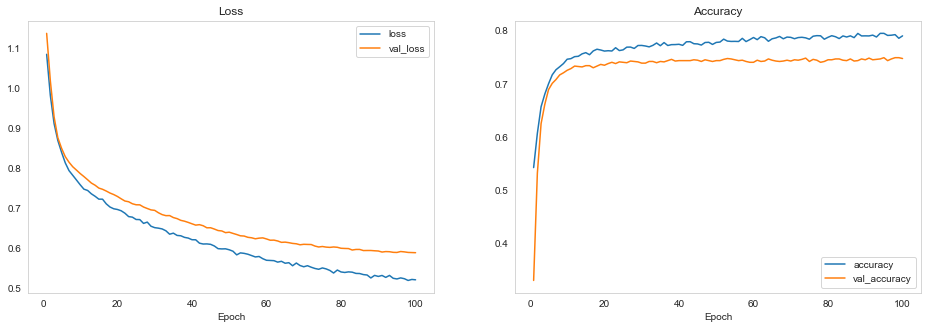

In [79]:
epoch=100

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),historyFunc2.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),historyFunc2.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].grid()
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),historyFunc2.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),historyFunc2.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].grid()
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

Dari hasil di atas, terlihat bahwa gradien exploding dapat ditekan. Bila membandingkan grafik perubahan nilai akurasi dan loss dari model sequential ANN setelah improvement dengan model functional ANN setelah improvement, maka terlihat bahwa model functional ANN lebih baik dari model sequential ANN.

## IX. Model Evaluation

Prediksi Model Functional

11/11 [==============================] - 0s 2ms/step
========== TEST ==========
              precision    recall  f1-score   support

           0       0.91      0.68      0.78       517
           1       0.48      0.82      0.60       186

    accuracy                           0.72       703
   macro avg       0.70      0.75      0.69       703
weighted avg       0.80      0.72      0.73       703



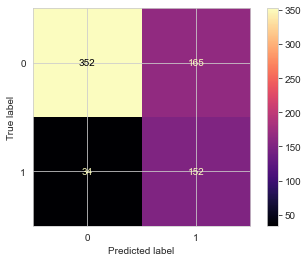

In [96]:
# predict probabilities
y_pred_func = model_func.predict(test_dataset)
y_pred_func = (y_pred_func > 0.4)

# classification report
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_func, zero_division=0))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_func)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='magma')
plt.show()

Dari hasil diatas, terlihat bahwa model dapat memprediksi dengan tingkat akurasi 72% dan memiliki nilai recall 0.82 untuk kelas target 1 (churn) sehingga dapat menekan jumlah False Negatif (kotak warna hitam pada confusion matrix). False Negatif adalah pelanggan yang sebenarnya churn tetapi malah diprediksi tidak churn. Hal ini akan merugikan perusahaan karena kita kurang memperhatikan pelanggan tersebut perusahaan akan kehilangan pelanggan

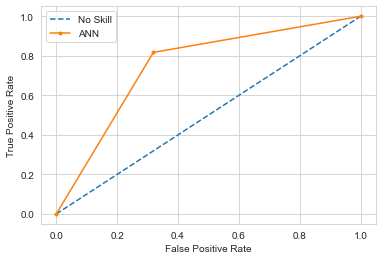

AUC score: 0.749027682452528


In [97]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_func)
auc = roc_auc_score(y_test, y_pred_func)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print(f'AUC score: {auc}')

Model functional sebelum improvement menghasilkan AUC score senilai 0.749 dan model dapat dikatakan baik untuk membedakan kedua kelas namun akan cenderung untuk memprediksi kelas 1.

Prediksi Model Functional setelah improvement

11/11 [==============================] - 0s 2ms/step
========== TEST ==========
              precision    recall  f1-score   support

           0       0.91      0.69      0.79       517
           1       0.49      0.80      0.60       186

    accuracy                           0.72       703
   macro avg       0.70      0.75      0.70       703
weighted avg       0.80      0.72      0.74       703



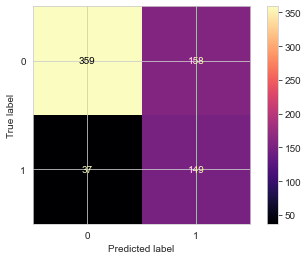

In [82]:
# predict probabilities
y_pred_func = model_func2.predict(test_dataset)
y_pred_func = (y_pred_func > 0.4)

# classification report
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_func, zero_division=0))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_func)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='magma')
plt.show()

Dari hasil diatas, terlihat bahwa model yang telah diperbaiki dapat memprediksi dengan tingkat akurasi 72% dan memiliki nilai recall 0.80 untuk kelas target 1 (churn) sehingga dapat menekan jumlah False Negatif (kotak warna hitam pada confusion matrix). False Negatif adalah pelanggan yang sebenarnya churn tetapi malah diprediksi tidak churn. Hal ini akan merugikan perusahaan karena kita kurang memperhatikan pelanggan tersebut perusahaan akan kehilangan pelanggan.

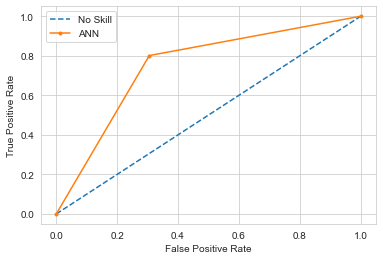

AUC score: 0.747732992242258


In [83]:
fpr_func, tpr_func, thresholds_func = roc_curve(y_test, y_pred_func)
auc_func = roc_auc_score(y_test, y_pred_func)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr_func, tpr_func, marker='.', label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print(f'AUC score: {auc_func}')

Model functional sebelum improvement menghasilkan AUC score senilai 0.747 dan model dapat dikatakan baik untuk membedakan kedua kelas namun akan cenderung untuk memprediksi kelas 1.

## X. Model Saving

Menyimpan model functional ANN

In [98]:
pickle.dump(prep_pipeline, open('M1P2_pred.pkl', 'wb'))
model_func2.save('churn_model.h5')

## XI. Model Inference

Melakukan inferensi

In [85]:
new_data = {'Gender': "Male",
  'SeniorCitizen': "No",
  'Partner': 'No',
  'Dependents': "Yes",
  'Tenure': 8,
  'PhoneService': "Yes",
  'MultipleLines': "No",
  'InternetService': "Fiber optic",
  'OnlineSecurity': "Yes",
  'OnlineBackup': "No",
  'DeviceProtection': "Yes",
  'TechSupport': "Yes",
  'StreamingTV': "No",
  'StreamingMovies': "No",
  'Contract': "Month-to-month",
  'PaperlessBilling': "No",
  'PaymentMethod': "Mailed check",
  'MonthlyCharges': 51,
  'TotalCharges': 397}


new_data = pd.DataFrame([new_data])
new_data

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,No,No,Yes,8,Yes,No,Fiber optic,Yes,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,51,397


membuat data inferensi final setelah seleksi feature

In [86]:
feat_num_inf = new_data[num_col_final]
feat_cat_inf = new_data[cat_final]
inf_final = pd.concat([feat_num_inf, feat_cat_inf], axis=1)

In [87]:
inf_final.columns

Index(['Tenure', 'MonthlyCharges', 'SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

Loading pipeline yang telah disimpan

In [88]:
with open('M1P2_pred.pkl', 'rb') as f:
    pipe_inf = pickle.load(f)

melakukan transoframasi menggunakan pipeline yang tersimpan

In [89]:
inf_pipe = pipe_inf.transform(inf_final)

load model functional ANN yang tersimpan

In [99]:
load_model_func = load_model('churn_model.h5')

melakukan prediksi pada data inference

In [100]:
pred_inf = load_model_func.predict(inf_pipe)
pred_inf = np.where(pred_inf > 0.4, 1, 0)

1/1 [==============================] - 0s 192ms/step


menetapkan treshold nilai kelas

In [101]:
if pred_inf == 1:
    churn_predict = 'Yes'
else:
    churn_predict = 'No'
new_data['Churn'] = churn_predict

Menampilkan hasil prediksi

In [93]:
new_data

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,No,No,Yes,8,Yes,No,Fiber optic,Yes,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,51,397,No


Terlihat bahwa data pelanggan diatas diprediksi tidak akan churn.

## XII. Kesimpulan

Dari projek ini, dapat disimpulkan:
- Tingkat churn pelanggan Telco dipengaruhi oleh feature 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Tenure', dan 'MonthlyCharges'
- Perusahaan Telco perlu meningkatkan kualitas layanan yang diberikan agar dapat mempertahan pelanggannya
- Model ANN Functional menghasilkan prediksi yang lebih baik dibandingkan model ANN Sequential
- Model ANN Functional yang dibuat berhasil dilakukan improvement dengan menekan gradien exploding
- Model ANN Functional yang telah di improve memiliki tingkat akurasi 72% dan memiliki nilai recall 0.80 untuk kelas target 1 (churn) sehingga dapat menekan jumlah False Negatif. False Negatif adalah pelanggan yang sebenarnya churn tetapi malah diprediksi tidak churn.